In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from google.colab import files


In [35]:
uploaded = files.upload()


Saving DECISION_TREE_IMPLEMENTATION.ipynb to DECISION_TREE_IMPLEMENTATION.ipynb


In [36]:
df = pd.read_csv('iris.csv')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
print("Column Names:", df.columns)
print("Dataset Info:")
print(df.info())
print("Target Class Distribution:")
print(df['species'].value_counts())


Column Names: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
Target Class Distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [38]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
print("Classes mapped as:", dict(zip(le.classes_, le.transform(le.classes_))))


Classes mapped as: {'setosa': np.int64(0), 'versicolor': np.int64(1), 'virginica': np.int64(2)}


In [39]:
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [40]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [41]:
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy Score: 1.0

 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



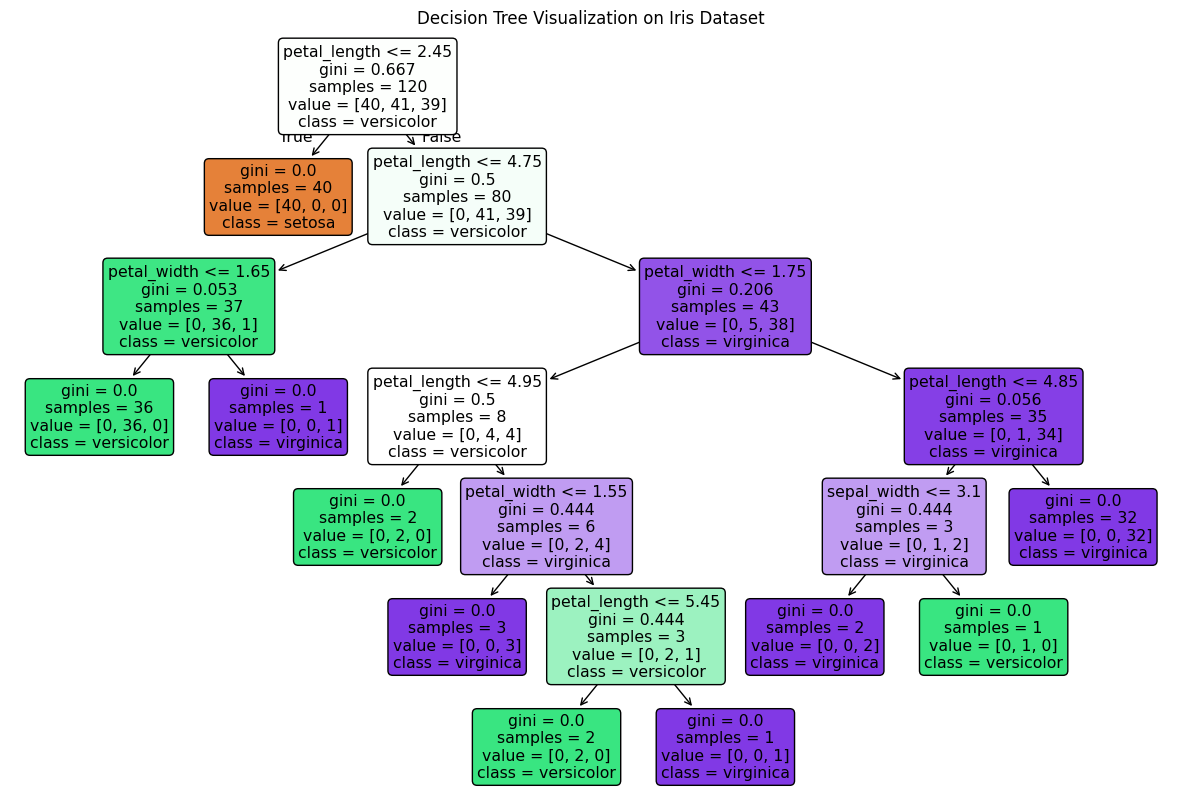

In [42]:
plt.figure(figsize=(15, 10))
plot_tree(model,
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True,
          rounded=True)
plt.title("Decision Tree Visualization on Iris Dataset")
plt.show()


In [43]:
print(" Decision Tree built and visualized successfully.")


 Decision Tree built and visualized successfully.
